# Chapter 4: Generated Data & Iris

This notebook contains the code for chapter 4 of the Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow book.

In [1]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np

## Global configuration

In [2]:
RANDOM_SEED = 42

In [3]:
np.random.seed(RANDOM_SEED)

## Generate <ins>linear</ins> data

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X[:5], y[:5]

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728]]),
 array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995]]))

## Train <ins>linear regression</ins> model (normal equation inverse)

Compute the value that minimizes the cost function ($\hat\theta$) using the normal equation.

In [5]:
# Add X_0 = 1 to each instance (bias)
X_bias = np.c_[np.ones((100, 1)), X]
X_bias[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [6]:
%%time
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
theta

CPU times: user 499 µs, sys: 820 µs, total: 1.32 ms
Wall time: 2.17 ms


array([[4.21509616],
       [2.77011339]])

## Train <ins>linear regression</ins> model (normal equation least squares)

In [7]:
%%time
theta, residuals, rank, s = np.linalg.lstsq(X_bias, y, rcond=1e-6)
theta

CPU times: user 0 ns, sys: 2.24 ms, total: 2.24 ms
Wall time: 1.93 ms


array([[4.21509616],
       [2.77011339]])

## Train <ins>linear regression</ins> model (normal equation pseudoinverse)

In [8]:
%%time
theta = np.linalg.pinv(X_bias).dot(y)
theta

CPU times: user 276 µs, sys: 452 µs, total: 728 µs
Wall time: 310 µs


array([[4.21509616],
       [2.77011339]])

## Evaluate <ins>linear regression</ins> model (normal equation)

In [9]:
X_test = np.array([[0], [2]])

In [10]:
# Add X_0 = 1 to each instance (bias)
X_test_bias = np.c_[np.ones((2, 1)), X_test]
X_test_bias[:5]

array([[1., 0.],
       [1., 2.]])

In [11]:
y_test_prediction = X_test_bias.dot(theta)
y_test_prediction

array([[4.21509616],
       [9.75532293]])

## Visualize <ins>linear regression</ins> model (normal equation)

(0.0, 2.0, 0.0, 15.0)

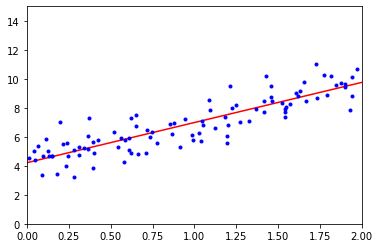

In [12]:
plt.plot(X_test, y_test_prediction, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

## Train <ins>linear regression</ins> model (scikit-learn)

In [13]:
lr_model = LinearRegression()

In [14]:
%%time
lr_model.fit(X, y)

CPU times: user 420 µs, sys: 642 µs, total: 1.06 ms
Wall time: 2.89 ms


LinearRegression()

In [15]:
lr_model.intercept_, lr_model.coef_

(array([4.21509616]), array([[2.77011339]]))

## Evaluate <ins>linear regression</ins> model (scikit-learn)

In [16]:
lr_model.predict(X_test)

array([[4.21509616],
       [9.75532293]])

## Train <ins>linear regression</ins> model (batch gradient decent)

In [17]:
M = 100
ETA = 0.1
ITERATIONS = 1000

In [18]:
theta = np.random.randn(2, 1)
theta

array([[0.01300189],
       [1.45353408]])

In [19]:
for iteration in range(ITERATIONS):
    gradients = 2/M * X_bias.T.dot(X_bias.dot(theta) - y)
    
    theta = theta - ETA * gradients

In [20]:
theta

array([[4.21509616],
       [2.77011339]])

## Train <ins>linear regression</ins> model (stochastic gradient decent)

In [21]:
M = 100
ETA = 0.1
EPOCHS = 50
T0, T1 = 5, 50

In [22]:
def learning_schedule(t):
    return T0 / (t + T1)

In [23]:
theta = np.random.randn(2, 1)
theta

array([[-0.26465683],
       [ 2.72016917]])

In [24]:
for epoch in range(EPOCHS):
    for i in range(M):
        index = np.random.randint(M)
        
        Xi = X_bias[index:index + 1]
        yi = y[index:index + 1]
        
        gradients = 2 * Xi.T.dot(Xi.dot(theta) - yi)
        
        eta = learning_schedule(epoch * M + i)
        
        theta = theta - eta * gradients

In [25]:
theta

array([[4.18475289],
       [2.73036719]])

## Train <ins>SGD regression</ins> model

In [26]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [27]:
%%time
sgd_model.fit(X, y.ravel())

CPU times: user 245 µs, sys: 359 µs, total: 604 µs
Wall time: 563 µs


SGDRegressor(eta0=0.1, penalty=None)

In [28]:
sgd_model.intercept_, lr_model.coef_

(array([4.22609703]), array([[2.77011339]]))

## Generate <ins>nonlinear</ins> data

In [29]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2  + X + 2 + np.random.randn(100, 1)

X[:5], y[:5]

(array([[ 2.94407494],
        [ 1.540381  ],
        [-0.34623717],
        [ 1.244382  ],
        [-0.66461717]]),
 array([[8.66516893],
        [5.77866288],
        [0.69876811],
        [3.2574389 ],
        [1.17471668]]))

## Transform <ins>nonlinear</ins> data

In [30]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

In [31]:
X_polynomial = polynomial_features.fit_transform(X)

X_polynomial[:5]

array([[ 2.94407494,  8.66757727],
       [ 1.540381  ,  2.37277363],
       [-0.34623717,  0.11988018],
       [ 1.244382  ,  1.54848656],
       [-0.66461717,  0.44171598]])

## Train <ins>polynomial linear regression</ins> model

In [32]:
lr_model = LinearRegression()

In [33]:
%%time
lr_model.fit(X_polynomial, y)

CPU times: user 302 µs, sys: 439 µs, total: 741 µs
Wall time: 908 µs


LinearRegression()

In [34]:
lr_model.intercept_, lr_model.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

## Visualize <ins>linear regression</ins> model

In [35]:
def plot_learning_curves(model, X, y):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
    
    train_errors, validation_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predictions = model.predict(X_train[:m])
        y_validation_predictions = model.predict(X_validation)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predictions))
        validation_errors.append(mean_squared_error(y_validation, y_validation_predictions))
        
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(validation_errors), "b-", linewidth=3, label="validation")

In [36]:
lr_model = LinearRegression()

CPU times: user 142 ms, sys: 0 ns, total: 142 ms
Wall time: 140 ms


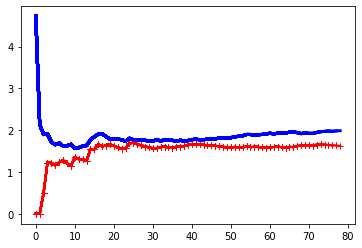

In [37]:
%%time
plot_learning_curves(lr_model, X, y)

## Visualize <ins>polynomial linear regression</ins> model

In [38]:
plr_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_regression", LinearRegression()),
])

CPU times: user 162 ms, sys: 3.42 ms, total: 165 ms
Wall time: 163 ms


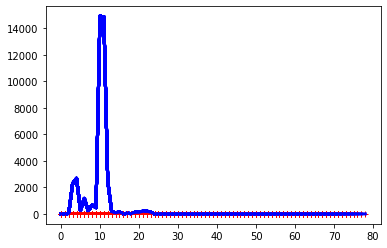

In [39]:
%%time
plot_learning_curves(plr_model, X, y)

## Generate <ins>linear</ins> data

In [40]:
X = 3 * np.random.rand(20, 1)
y = 1 + 0.5 * X + np.random.randn(20, 1) / 1.5

X[:5], y[:5]

(array([[1.73057214],
        [1.39194509],
        [0.35612729],
        [2.94170468],
        [0.64408766]]),
 array([[0.59341437],
        [1.12238254],
        [0.90232662],
        [3.72931078],
        [1.69307925]]))

## Train <ins>ridge linear regression</ins> model

In [41]:
rig_model = Ridge(alpha=1, solver="cholesky")

In [42]:
%%time
rig_model.fit(X, y)

CPU times: user 1.46 ms, sys: 0 ns, total: 1.46 ms
Wall time: 1.23 ms


Ridge(alpha=1, solver='cholesky')

## Evaluate <ins>ridge linear regression</ins> model

In [43]:
rig_model.predict([[1.5]])

array([[1.49214422]])

## Train <ins>ridge SGD regression</ins> model

In [44]:
rsgd_model = SGDRegressor(penalty="l2")

In [45]:
%%time
rsgd_model.fit(X, y.ravel())

CPU times: user 278 µs, sys: 287 µs, total: 565 µs
Wall time: 405 µs


SGDRegressor()

## Evaluate <ins>ridge SGD regression</ins> model

In [46]:
rsgd_model.predict([[1.5]])

array([1.38431702])

## Train <ins>lasso linear regression</ins> model

In [47]:
las_model = Lasso(alpha=0.1)

In [48]:
%%time
las_model.fit(X, y)

CPU times: user 227 µs, sys: 235 µs, total: 462 µs
Wall time: 730 µs


Lasso(alpha=0.1)

## Evaluate <ins>lasso linear regression</ins> model

In [49]:
las_model.predict([[1.5]])

array([1.4932814])

## Train <ins>elasticnet linear regression</ins> model

In [50]:
en_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [51]:
%%time
en_model.fit(X, y)

CPU times: user 410 µs, sys: 422 µs, total: 832 µs
Wall time: 601 µs


ElasticNet(alpha=0.1)

## Evaluate <ins>elasticnet linear regression</ins> model

In [52]:
en_model.predict([[1.5]])

array([1.49282406])

## Generate <ins>nonlinear</ins> data

In [53]:
X = 6 * np.random.rand(100, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(100, 1)

X[:5], y[:5]

(array([[ 1.94174166],
        [-0.69233354],
        [-0.24525586],
        [-1.18028465],
        [ 2.59532927]]),
 array([[ 4.53378047],
        [ 2.11971964],
        [ 2.23542277],
        [-0.35356506],
        [ 6.80141244]]))

In [54]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X[:50],
    y[:50].ravel(),
    test_size=0.5,
    random_state=RANDOM_SEED,
)

## Transform <ins>nonlinear</ins> data

In [55]:
polynomial_scaler = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("standard_scaler", StandardScaler()),
])

In [56]:
X_train_polynomial_scaled = polynomial_scaler.fit_transform(X_train)

In [57]:
X_validation_polynomial_scaled = polynomial_scaler.transform(X_validation)

## Train <ins>early stopping sgd regression</ins> model

In [58]:
sgd_model = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
)

In [59]:
%%time
min_validation_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_model.fit(X_train_polynomial_scaled, y_train)
    
    y_validation_predictions = sgd_model.predict(X_validation_polynomial_scaled)
    validation_error = mean_squared_error(y_validation, y_validation_predictions)
    
    if validation_error < min_validation_error:
        min_validation_error = validation_error
        best_epoch = epoch
        best_model = clone(sgd_model)

CPU times: user 368 ms, sys: 0 ns, total: 368 ms
Wall time: 367 ms


## Load <ins>iris</ins> data

In [60]:
iris = datasets.load_iris()

## Split <ins>iris</ins> data

In [61]:
X, y = iris["data"][:, 3:], (iris["target"] == 2).astype(int)

In [62]:
X.shape, y.shape

((150, 1), (150,))

## Train <ins>logistic regression</ins> model

In [63]:
log_model = LogisticRegression()

In [64]:
%%time
log_model.fit(X, y)

CPU times: user 2.01 ms, sys: 1.79 ms, total: 3.8 ms
Wall time: 3.05 ms


LogisticRegression()

## Visualize <ins>logistic regression</ins> model

In [65]:
X_test = np.linspace(0, 3, 1000).reshape(-1, 1)

In [66]:
y_test_probability = log_model.predict_proba(X_test)

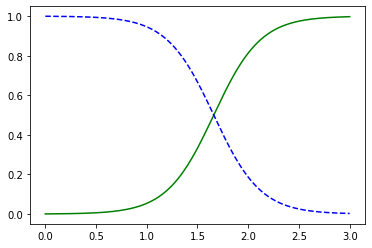

In [67]:
plt.plot(X_test, y_test_probability[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_test, y_test_probability[:, 0], "b--", label="Not Iris-Virginica")

## Evaluate <ins>logistic regression</ins> model

In [68]:
log_model.predict([[1.7], [1.5]])

array([1, 0])

## Train <ins>softmax logistic regression</ins> model

In [69]:
X, y = iris["data"][:, (2, 3)], iris["target"]

In [70]:
smlog_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [71]:
%%time
smlog_model.fit(X, y)

CPU times: user 14.6 ms, sys: 0 ns, total: 14.6 ms
Wall time: 12.8 ms


LogisticRegression(C=10, multi_class='multinomial')

## Evaluate <ins>softmax logistic regression</ins> model

In [72]:
smlog_model.predict([[5, 2]])

array([2])

In [73]:
smlog_model.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises

1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

**Solution**

Any gradient decent algorithm performs good on datasets with a lot of features.

2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

**Solution**

Gradient decent suffers from unscaled training data, because the cost function takes the shape of an elongated bowl with unscaled training data. Therefore gradient decent will take a long time to converge to the minimum.

A way to solve this issue is to apply a standard scaler to the dataset for example.

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

**Solution**

No, because the cost function of logistic regression is convex.

4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

**Solution**

No, they will all get very close to the minimum but they will not reach it exactly therfore the models will vary slightly. Assuming the cost function is convex and the learning rate is not too high.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

**Solution**

If the validation error consitently goes up during training the learning rate is too high.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

**Solution**

Due to the random nature of mini-batch gradient decent it could be happen that no progress is made during some epochs. Thus it is a bad idea stop mini-batch gradient decent as soon as the validation error goes up, because it is possible that the validation error goes down again after a while.

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

**Solution**

The algorithm that will reach the optimal solution the fastest is stochastic gradient decent (because it only considers one training instance at a time). The algorithm that will actually converge is batch gradient decent (because stochastic and mini-batch gradient decent will bounce around the minimum due to their random nature).

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

**Solution**

A gap between the training error and validation error means that the model is overfitting. This can be solved by choosing a less complex model, applying regularization or gathering more training data.

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter $\alpha$ or reduce it?

**Solution**

If the validation error and training error are both fairly high the model has a high bias. The model is too simple to fit to the training data therefore you should reduce the hyperparameter $\alpha$.

10. Why would you want to use:
* Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
* Lasso instead of Ridge Regression?
* Elastic Net instead of Lasso?

**Solution**

* A model with regularization typically performs better than a model without regularization, therfore you should prefer to use ridge regression over plain linear regression.
* Lasso tends to push the weights down to 0 of features that are not important. So you should prefer to use lasso over ridge regression if you also want to do some feature selection.
* Lasso can be have erratically in situations where the features are highly correlated, thefore you should prefer to use elastic net over lasso.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

**Solution**

Since these classes are not exclusive (i.e. outdoor, indoor, daytime or nighttime) you should implement two logistic regression classifiers.